In [1]:
import numpy as np


from pow.compute.mvp import simulate_network_computation



In [7]:
matrix_size = 16
d = 2

num_nodes = 64
results = {}

for difficulty in range(1, 4):
    if difficulty > 4:
      work_time = 3*10**7
    elif difficulty == 4:
      work_time = 10**5
    else:
      work_time = 10**6

    results[difficulty] = simulate_network_computation(
        num_nodes,
        matrix_size,
        d,
        difficulty,
        work_time,
    )
    print([len(res[2]) for res in results[difficulty]])

  0%|          | 0/64 [00:00<?, ?it/s]

[62451, 62649, 62360, 62656, 62914, 62380, 62681, 62451, 62758, 62326, 62278, 62563, 62570, 62507, 62804, 62519, 62367, 62726, 62532, 62568, 62461, 62454, 62487, 62919, 62318, 62524, 62747, 62823, 62547, 61986, 62626, 62225, 62545, 62454, 62259, 62525, 62633, 62461, 62213, 62653, 62370, 62143, 62694, 62522, 62301, 62374, 62582, 62541, 62770, 62409, 62512, 62820, 62416, 62582, 62458, 62466, 61948, 62542, 62272, 62477, 62213, 62891, 62746, 62493]


  0%|          | 0/64 [00:00<?, ?it/s]

[3970, 3968, 3943, 4012, 3979, 3872, 3883, 3825, 3993, 3849, 3952, 4039, 4094, 3941, 4022, 3949, 3871, 3838, 3965, 3934, 3929, 3949, 4019, 3901, 3926, 3966, 3928, 3970, 3910, 3884, 3817, 3885, 3948, 3891, 3804, 3745, 4006, 3834, 3730, 3929, 3931, 3925, 3931, 3825, 3864, 3975, 3913, 3809, 3890, 3988, 3903, 3950, 3846, 3845, 3938, 3918, 3965, 3923, 3912, 3864, 3884, 3990, 3918, 3847]


  0%|          | 0/64 [00:00<?, ?it/s]

[258, 235, 258, 241, 232, 244, 235, 261, 218, 255, 261, 256, 272, 273, 252, 256, 214, 225, 256, 252, 263, 253, 252, 247, 246, 201, 230, 254, 214, 245, 285, 239, 223, 259, 213, 221, 250, 237, 235, 257, 237, 229, 265, 224, 247, 230, 241, 232, 245, 229, 228, 252, 262, 228, 252, 228, 256, 271, 244, 230, 232, 259, 235, 252]


In [10]:
for difficulty in results.keys():
    power_list = [len(res[2]) for res in results[difficulty]]
    print("{}: {} ± {:.2f}".format(difficulty, np.mean(power_list), np.std(power_list)))

1: 62507.21875 ± 202.87
2: 3916.0 ± 68.04
3: 243.53125 ± 16.67


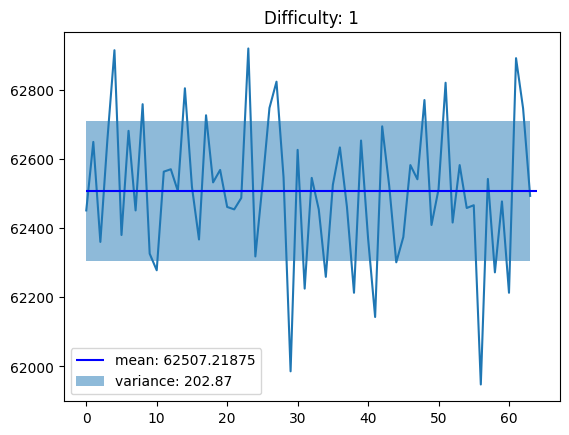

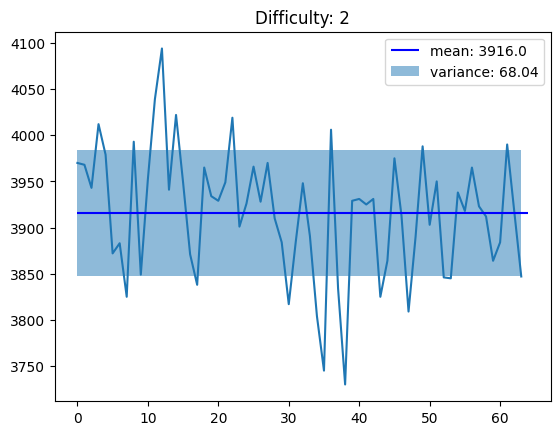

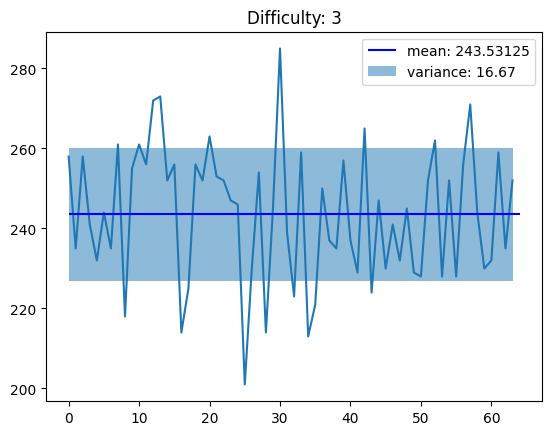

In [11]:
import matplotlib.pyplot as plt

for difficulty in results.keys():
    power_list = [len(res[2]) for res in results[difficulty]]
    plt.title("Difficulty: " + str(difficulty))
    plt.plot(power_list)
    plt.hlines(np.mean(power_list), 0, len(power_list), color="b",
            label="mean: {}".format(np.mean(power_list)))
    plt.fill_between(np.arange(len(power_list)),
                    np.mean(power_list)-np.std(power_list),
                    np.mean(power_list)+np.std(power_list),
                    alpha=0.5, label="variance: {:.2f}".format(np.std(power_list)))

    plt.legend();
    plt.show()

In [21]:
byte_with_leading_zeros = b'\x00\x00\x00\x00\x00\x00\x00\x01'
print(byte_with_leading_zeros.count(b'\x00'))
print(byte_with_leading_zeros.count(b'\x01'))


7
1


In [22]:
import secrets

# Create a byte string with 3 leading zeros
leading_zeros = b'\x00\x00\x00'
# Generate random bytes for the rest of the hash (SHA-256 is 32 bytes)
random_bytes = secrets.token_bytes(29)  # 32 - 3 = 29 bytes

# Concatenate to form the final byte string
byte_string = leading_zeros + random_bytes

from pow.compute.utils import count_leading_zeros
print(count_leading_zeros(byte_string))


b'\x00\x00\x00\x08]j\xa1\rhV\xcfH\xe4w\xbb\xd6\\\xc3\x0c[\x1f\xcd\x13}\x0f\x06\x135x@\xc6\x1c'


In [23]:
from pow.compute.utils import count_leading_zeros
print(count_leading_zeros(byte_string))

27


In [26]:
from pow.compute.utils import *

In [27]:
meets_required_zeros

NameError: name 'meets_required_zeros' is not defined

In [123]:


def meets_required_zeros(hash_bytes: bytes, required_zeros: int) -> bool:
    total_bits = len(hash_bytes) * 8
    target = (1 << (total_bits - required_zeros)) - 1
    hash_int = int.from_bytes(hash_bytes, byteorder='big')
    return hash_int <= target


In [118]:
import secrets

# Create a byte string with 3 leading zeros
leading_zeros = b'\x00\x00\x00'
# Generate random bytes for the rest of the hash (SHA-256 is 32 bytes)
random_bytes = secrets.token_bytes(28)  # 32 - 3 = 29 bytes

# Concatenate to form the final byte string
byte_string = leading_zeros + random_bytes
leading_zeros_count = count_leading_zeros(byte_string)

def print_bits(byte_seq: bytes) -> str:
    # Convert each byte to its binary representation and concatenate them
    bit_string = ''.join(f'{byte:08b}' for byte in byte_seq)
    return bit_string

def print_bytes_as_bits(byte_seq: bytes):
    # Convert each byte to its binary representation and print them
    for byte in byte_seq:
        # Format each byte to an 8-bit binary string
        print(f'{byte:08b}', end=' ')

bits = print_bits(byte_string)
print(bits)
print_bytes_as_bits(byte_string)


00000000000000000000000011010001010011100111000111011010110110010011110011100110101110111101011001000100000100011101101010101001000011110110011010110011000001101111101010111110001000000010000001100011110111101001000011001000011110001011100110001100
00000000 00000000 00000000 11010001 01001110 01110001 11011010 11011001 00111100 11100110 10111011 11010110 01000100 00010001 11011010 10101001 00001111 01100110 10110011 00000110 11111010 10111110 00100000 00100000 01100011 11011110 10010000 11001000 01111000 10111001 10001100 

In [124]:
print(count_leading_zeros(byte_string))

START
ADD 8
ADD 8
ADD 8
ADD 4
28


In [122]:
def count_leading_symbols(s: str, symbol: str) -> int:
    count = 0
    for char in s:
        if char == symbol:
            count += 1
        else:
            break
    return count

n_leading_zeros = count_leading_symbols(bits, '0')
print(n_leading_zeros, meets_required_zeros(byte_string, n_leading_zeros),  meets_required_zeros(byte_string, n_leading_zeros+1))
print(count_leading_zeros(byte_string), meets_required_zeros(byte_string, count_leading_zeros(byte_string)))


24 True False
8
16
24
28
8
16
24
28
28 False


In [126]:
meets_required_zeros(b'\x00\x00\x00\x01', 26) 

True

In [131]:
print_bytes_as_bits(b'\x00\x00\x00\x7F')

00000000 00000000 00000000 01111111 

In [5]:
from pow.compute.pipeline import Compute

In [8]:
c1 = Compute(public_key="test")
c2 = Compute(public_key="test")
c1(0) == c2(0)

False

In [9]:
from pow.compute.pipeline import Pipeline
p1 = Pipeline(public_key="test", compute=c1, target_leading_zeros=2)
p2 = Pipeline(public_key="test", compute=c2, target_leading_zeros=2)